In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("./heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
df.count()

age         303
sex         303
cp          303
trestbps    303
chol        303
fbs         303
restecg     303
thalach     303
exang       303
oldpeak     303
slope       303
ca          303
thal        303
target      303
dtype: int64

In [3]:
df.shape

(303, 14)

In [4]:
for i in df.columns:
    print(i)
    print(df[i].value_counts())
    print('\n')

age
58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
38     3
34     2
37     2
77     1
76     1
74     1
29     1
Name: age, dtype: int64


sex
1    207
0     96
Name: sex, dtype: int64


cp
0    143
2     87
1     50
3     23
Name: cp, dtype: int64


trestbps
120    37
130    36
140    32
110    19
150    17
138    13
128    12
125    11
160    11
112     9
132     8
118     7
135     6
108     6
124     6
145     5
134     5
152     5
122     4
170     4
100     4
142     3
115     3
136     3
105     3
180     3
126     3
102     2
94      2
144     2
178     2
146     2
148     2
129     1
165     1
101     1
174     1
104     1
172     1
106     1
156     1
164     1
192     1
114     1
155     1
117     1
154     1
123     1


In [5]:
# df['target'] = df['target'].apply(str)
# df.info()

In [6]:
import seaborn as sns

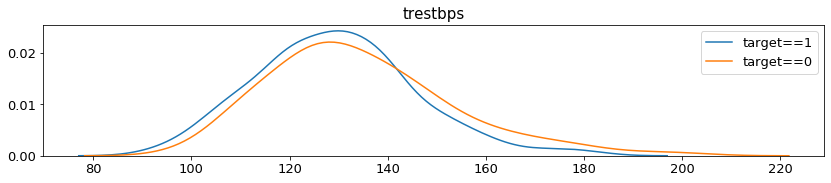

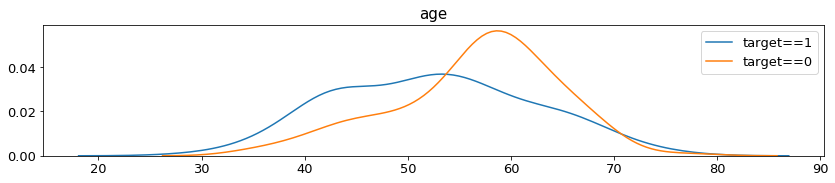

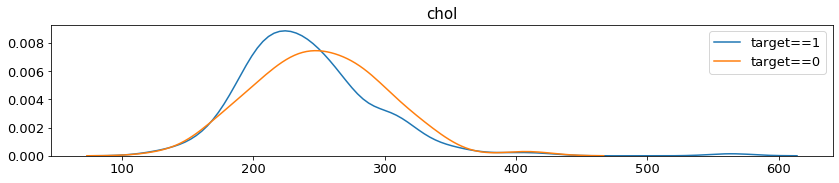

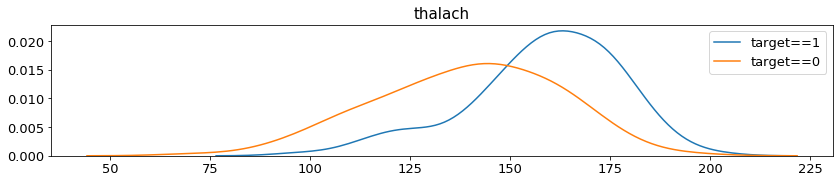

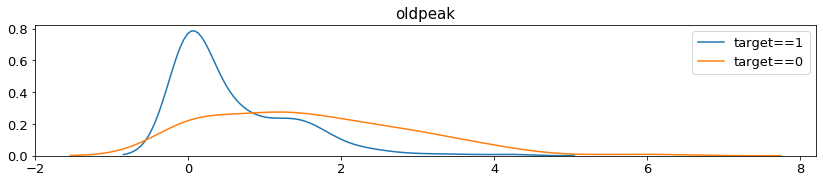

In [7]:
plt.rc('font', size=13)

plt.figure(figsize=(14, 14))
plt.subplot(5, 1, 1)
plt.title('trestbps', fontsize=15)
sns.kdeplot(df[df['target']==1].trestbps)
sns.kdeplot(df[df['target']==0].trestbps)
plt.legend(['target==1', 'target==0'])
plt.show()

# plt.rc('font', size=15)
plt.figure(figsize=(14, 14))
plt.subplot(5, 1, 2)
plt.title('age', fontsize=15)
sns.kdeplot(df[df['target']==1].age)
sns.kdeplot(df[df['target']==0].age)
plt.legend(['target==1', 'target==0'])

plt.figure(figsize=(14, 14))
plt.subplot(5, 1, 3)
plt.title('chol', fontsize=15)
sns.kdeplot(df[df['target']==1].chol)
sns.kdeplot(df[df['target']==0].chol)
plt.legend(['target==1', 'target==0'])


plt.figure(figsize=(14, 14))
plt.subplot(5, 1, 4)
plt.title('thalach', fontsize=15)
sns.kdeplot(df[df['target']==1].thalach)
sns.kdeplot(df[df['target']==0].thalach)
plt.legend(['target==1', 'target==0'])

plt.figure(figsize=(14, 14))
plt.subplot(5, 1, 5)
plt.title('oldpeak', fontsize=15)
sns.kdeplot(df[df['target']==1].oldpeak)
sns.kdeplot(df[df['target']==0].oldpeak)
plt.legend(['target==1', 'target==0'])

plt.show()

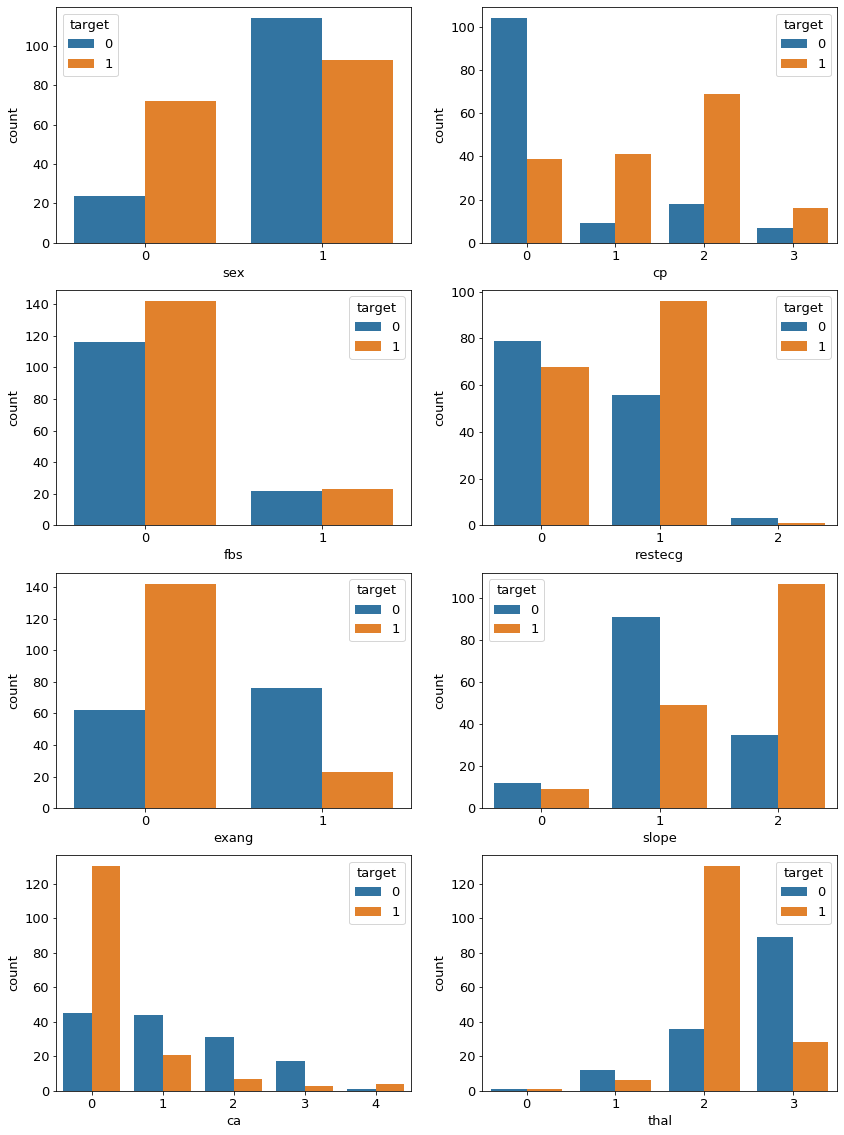

In [8]:
plt.rc('font', size=13)
plt.figure(figsize=(14, 14))

plt.rc('font', size=13)
plt.subplot(4, 2, 1);
sns.countplot('sex', hue='target', data=df)
plt.subplots_adjust(top = 1.2)

plt.subplot(4, 2, 2);
sns.countplot('cp', hue='target', data=df)

plt.subplot(4, 2, 3);
sns.countplot('fbs', hue='target', data=df)

plt.subplot(4, 2, 4);
sns.countplot('restecg', hue='target', data=df)

plt.subplot(4, 2, 5);
sns.countplot('exang', hue='target', data=df)

plt.subplot(4, 2, 6);
sns.countplot('slope', hue='target', data=df)

plt.subplot(4, 2, 7);
sns.countplot('ca', hue='target', data=df)

plt.subplot(4, 2, 8);
sns.countplot('thal', hue='target', data=df)


# sns.countplot('oldpeak', hue='target', data=df)

plt.show()

In [61]:
X = df.drop("target", axis =1, inplace = False)
y = df["target"]

print(X.shape, y.shape)

(303, 13) (303,)


In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [75]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=42, max_depth=1,learning_rate = 0.1)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.890
테스트 세트 정확도: 0.855


In [76]:
from sklearn.metrics import accuracy_score

y_train_hat = gbrt.predict(X_train)
print('train accuracy : ',accuracy_score(y_train, y_train_hat))
y_test_hat = gbrt.predict(X_test)
print('test accuracy : ',accuracy_score(y_test, y_test_hat))

from sklearn.metrics import classification_report
print('\n')
class_names = ['target=0','target=1']
print(classification_report(y_test, y_test_hat, target_names=class_names))

train accuracy :  0.8898678414096917
test accuracy :  0.8552631578947368


              precision    recall  f1-score   support

    target=0       0.87      0.79      0.83        33
    target=1       0.85      0.91      0.88        43

    accuracy                           0.86        76
   macro avg       0.86      0.85      0.85        76
weighted avg       0.86      0.86      0.85        76



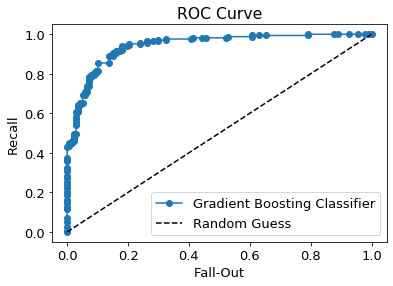

In [83]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y, gbrt.predict_proba(X)[:,1])

plt.plot(fpr, tpr, 'o-', label="Gradient Boosting Classifier")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.legend()
plt.xlabel('Fall-Out')
plt.ylabel('Recall')
plt.title('ROC Curve')
plt.show()

In [58]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [60]:
# X_train, X_test, y_train, y_test = train_test_split(, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=1000, random_state=0)
forest.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.842


In [81]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

scores = cross_val_score(gbrt, X, y, cv=15)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 0.85 (+/- 0.14)
